In [3]:
!pip install -U -q pyDrive2
from pydrive2.auth import GoogleAuth
from pydrive2.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

downloaded = drive.CreateFile({'id': '1pJL1IdXHqZ5NA984gxzAY0A4HeWyIc3D'}) # Pass file ID as key-value pair
downloaded.GetContentFile('train.csv')

import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [22]:
xyz=pd.read_csv('train.csv')
xyz
df=xyz.copy()

In [26]:
def remove_comma_period(Name):
  new_name = ''.join(Name.split(','))
  new_name = ''.join(new_name.split('.'))
  new_name = ''.join(new_name.split(' '))
  new_name=''.join(new_name.split('('))
  new_name=''.join(new_name.split(')'))
  new_name=''.join(new_name.split('"'))
  return new_name

df['Name'] = df['Name'].apply(remove_comma_period)

In [27]:
df

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,BraundMrOwenHarris,male,22.0,1,0,7.2500,NaN,S
1,1,CumingsMrsJohnBradleyFlorenceBriggsThayer,female,38.0,1,0,71.2833,C85,C
2,3,HeikkinenMissLaina,female,26.0,0,0,7.9250,NaN,S
3,1,FutrelleMrsJacquesHeathLilyMayPeel,female,35.0,1,0,53.1000,C123,S
4,3,AllenMrWilliamHenry,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,2,MontvilaRevJuozas,male,27.0,0,0,13.0000,NaN,S
887,1,GrahamMissMargaretEdith,female,19.0,0,0,30.0000,B42,S
888,3,JohnstonMissCatherineHelenCarrie,female,NaN,1,2,23.4500,NaN,S
889,1,BehrMrKarlHowell,male,26.0,0,0,30.0000,C148,C


In [43]:
df=xyz.drop(['PassengerId','Ticket','Cabin'],axis=1)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


In [44]:
print(df.columns)

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')


In [45]:

missing_values = df.isnull().sum()
print(missing_values)


df['Age'].fillna(df['Age'].median(), inplace=True)




df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64


In [46]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


In [49]:

df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

df['Title'] = df['Name'].apply(lambda x: x.split(' ')[1].split('.')[0])


df['Title'] = df['Title'].replace(['Mlle', 'Ms', 'Mme'], 'Miss')
df['Title'] = df['Title'].replace(['Lady', 'Countess', 'Don', 'Dr',
                                    'Major', 'Rev', 'Sir', 'Col',
                                    'Capt', 'Jonkheer', 'Dona'], 'Rare')
def family_size_group(size):
    if size == 1:
        return 'Alone'
    elif size <= 4:
        return 'Small'
    else:
        return 'Large'

df['FamilySizeGroup'] = df['FamilySize'].apply(family_size_group)


df['FarePerPerson'] = df['Fare'] / df['FamilySize']


df['Pclass*Age'] = df['Pclass'] * df['Age']


df['IsChild'] = (df['Age'] < 16).astype(int)


df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title,FamilySizeGroup,FarePerPerson,Pclass*Age,IsChild
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,Mr,Small,3.62500,66.0,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,Mrs,Small,35.64165,38.0,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,Miss,Alone,7.92500,78.0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,Mrs,Small,26.55000,35.0,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,Mr,Alone,8.05000,105.0,0


In [50]:
df['Title'] = df['Title'].replace(['Mlle', 'Ms', 'Mme'], 'Miss')
df['Title'] = df['Title'].replace(['Lady', 'Countess', 'Don', 'Dr',
                                    'Major', 'Rev', 'Sir', 'Col',
                                    'Capt', 'Jonkheer', 'Dona'], 'Rare')

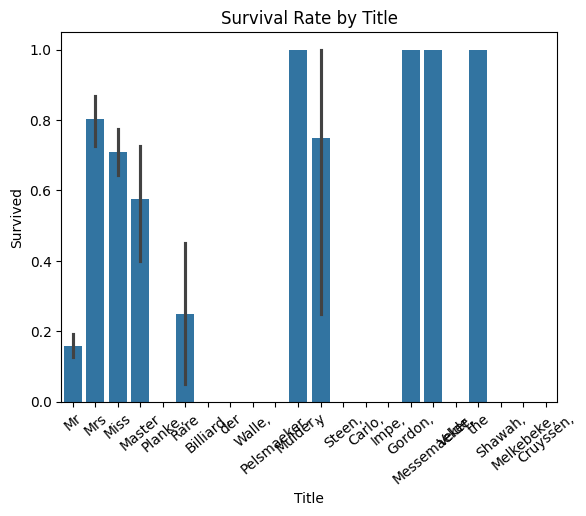

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='Title', y='Survived', data=df)
plt.title('Survival Rate by Title')
plt.xticks(rotation=40)
plt.xticks(fontsize=10)
plt.show()


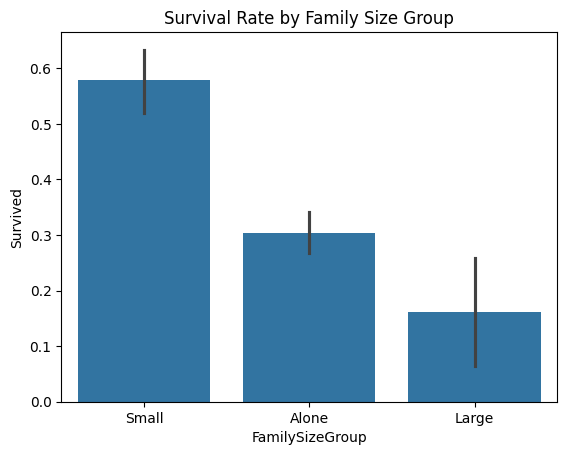

In [57]:
sns.barplot(x='FamilySizeGroup', y='Survived', data=df)
plt.title('Survival Rate by Family Size Group')
plt.show()


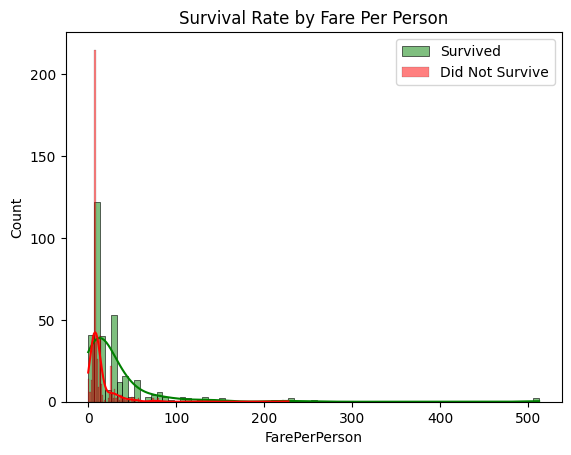

In [61]:
sns.histplot(df[df['Survived'] == 1]['FarePerPerson'], kde=True, color='green', label='Survived')
sns.histplot(df[df['Survived'] == 0]['FarePerPerson'], kde=True, color='red', label='Did Not Survive')
plt.title('Survival Rate by Fare Per Person')
plt.legend()
plt.show()


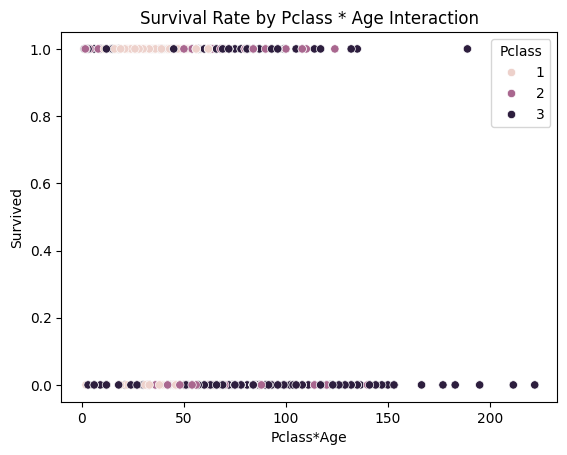

In [62]:
sns.scatterplot(x='Pclass*Age', y='Survived', data=df, hue='Pclass')
plt.title('Survival Rate by Pclass * Age Interaction')
plt.show()


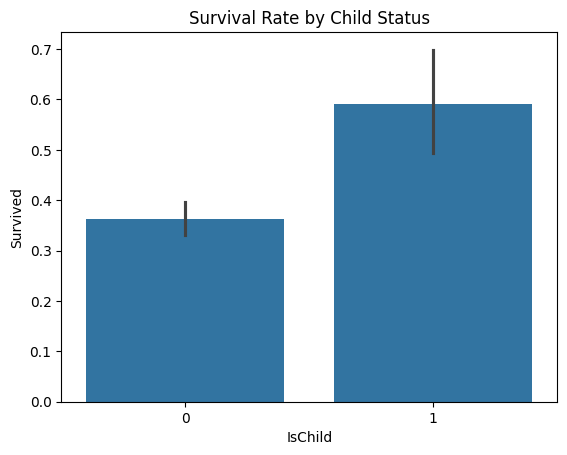

In [63]:
sns.barplot(x='IsChild', y='Survived', data=df)
plt.title('Survival Rate by Child Status')
plt.show()
